In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Data Checks To Perform**
* check missing values
* check duplicates
* check data types
* check the number of unique values 
* check statatics of dataset
* check various categories prsent in the diffrent categorical column

In [4]:
# chech the missng values
df.isnull().sum()

# conclusion dataset has no missing values 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
# check the duplicate values 
df.duplicated().sum()

# conclusion dataset has no duplicate values 

0

In [6]:
# check data type
df.info()

# conclusion it has three  int types nad 5 object types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# check the number of unique values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
# Check the statistics of the data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## insights or obeservation

* from the above description of above data, all mean are very close to each other-between 66 and 68
* All the stander devition are also close between 14.60 to 15.19
* while there is a minimun of 0 for maths, other are having 17 and 10 value


In [9]:
# Explore more info about dataset

# sagrigate the features based on there datatypes

numerical_features = [i for i in df.columns if df[i].dtype != 'O']
categorical_features = [i for i in df.columns if df[i].dtype =='O']
numerical_features

['math_score', 'reading_score', 'writing_score']

In [10]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [11]:
for i in categorical_features:
    print(df[i].value_counts())

female    518
male      482
Name: gender, dtype: int64
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64
standard        645
free/reduced    355
Name: lunch, dtype: int64
none         642
completed    358
Name: test_preparation_course, dtype: int64


In [12]:
# Aggreigate  the total score with mean

df['total_score'] = (df['math_score']+df['writing_score']+df['reading_score'])
df['avarage'] = (df['total_score']/3)

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avarage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: xlabel='avarage', ylabel='Count'>

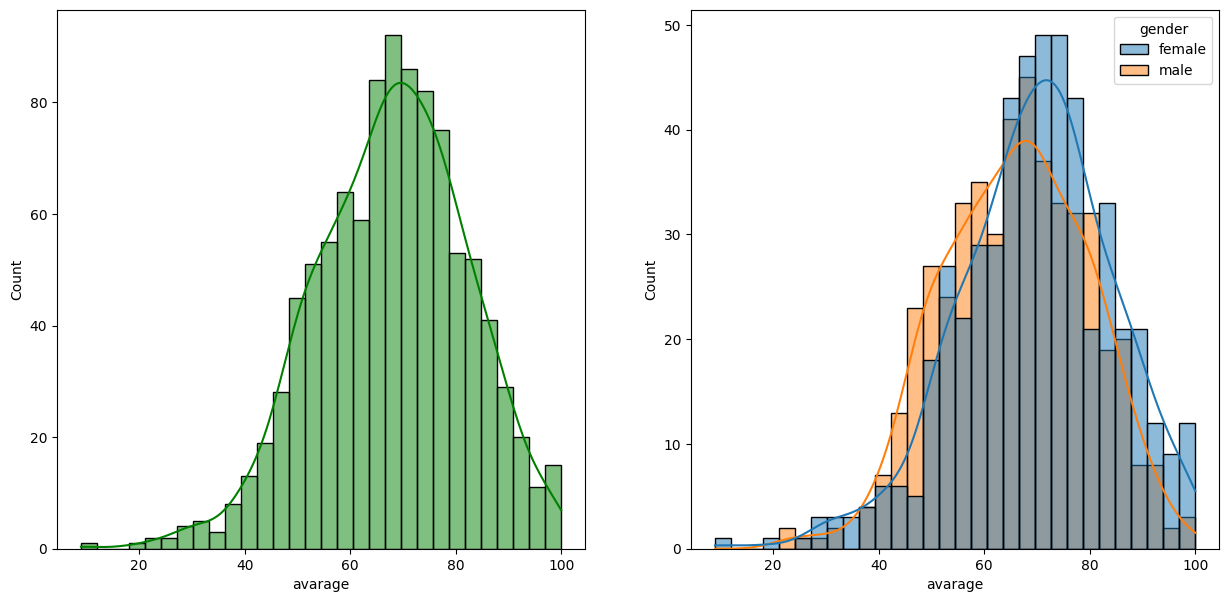

In [14]:
# Exploring more visualization

fig,axis = plt.subplots(1,2,figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='avarage',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avarage',hue='gender',bins=30,kde=True,color='g')

# **INSIGHTS** 
**female students performs to well than the male student**

<AxesSubplot: xlabel='avarage', ylabel='Count'>

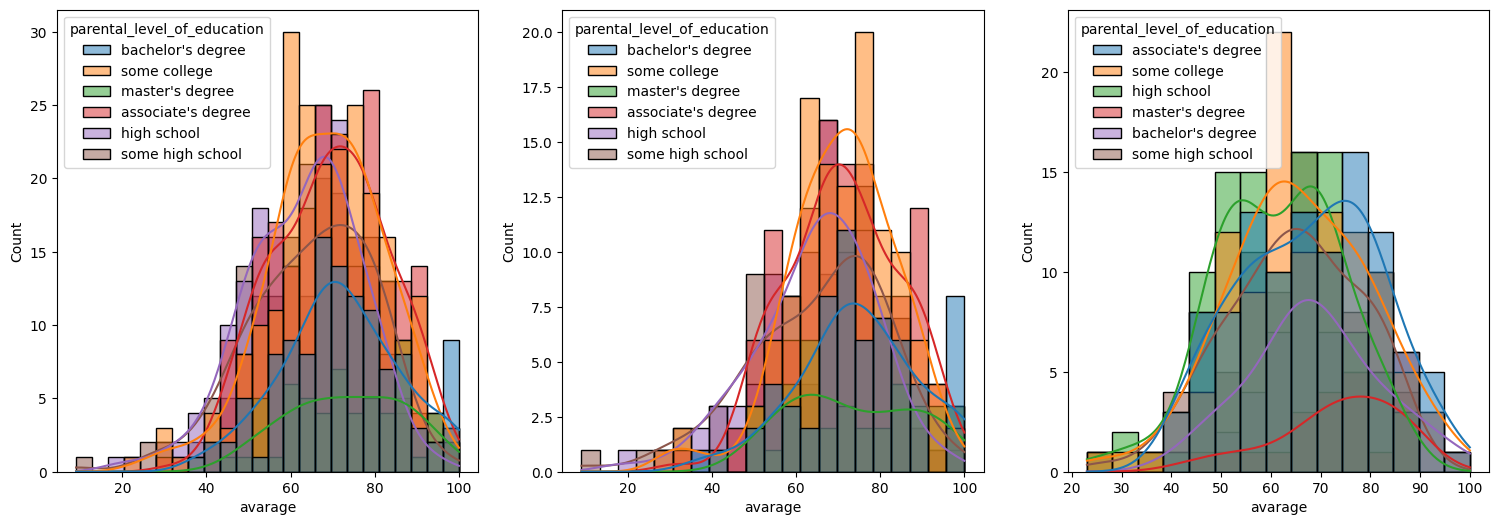

In [17]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df,x='avarage',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avarage',kde=True,hue="parental_level_of_education")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avarage',kde=True,hue="parental_level_of_education")
             

# **INSIGHTS** 
**Standerd lunch helps to perform well in exam for both male and female students**

<AxesSubplot: xlabel='avarage', ylabel='Count'>

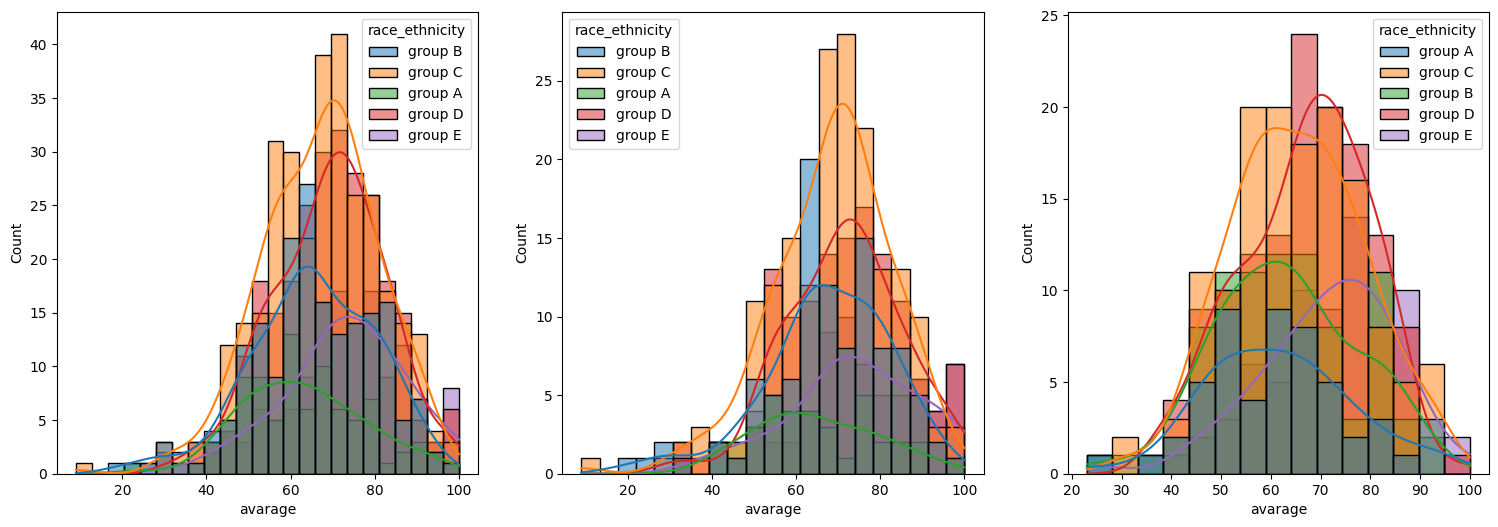

In [22]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df,x='avarage',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='avarage',kde=True,hue="race_ethnicity")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='avarage',kde=True,hue="race_ethnicity")
             

**Insignts**
- students in group A and b are performs poorly in exam 
- stundents in C,D and E perform well as compared remeaning , group E perform quit well in than other group  